# MNIST - Categorical Classification
> # Overfitting Issue
## Import TensorFlow

In [73]:
import warnings
warnings.filterwarnings('ignore')

* import TensorFlow

In [74]:
import tensorflow as tf

tf.__version__

'2.15.0'

* GPU 설정 확인

In [75]:
tf.test.gpu_device_name()

'/device:GPU:0'

* GPU 종류 확인

In [76]:
!nvidia-smi

Tue Jul 23 07:43:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0              32W /  70W |   2179MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# I. MNIST Data_Set Load & Review

> ## 1) Load MNIST Data_Set

In [77]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

* Train_Data Information

In [78]:
print(len(X_train))
print(X_train.shape)
print()
print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)

60000
[5 0 4 1 9]


* Test_Data Information

In [79]:
print(len(X_test))
print(X_test.shape)
print()
print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)

10000
[7 2 1 0 4]


> ## 2) Visualization

* matplotlib

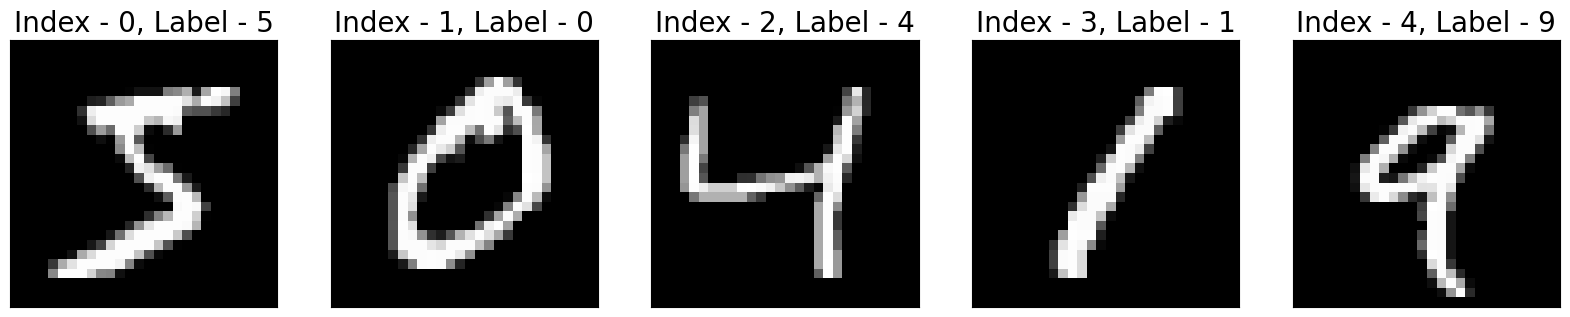

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 4))
for idx in range(5):
    label = y_train[idx]
    plt.subplot(1, 5, idx + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[idx], cmap = 'gray')
    plt.title('Index - %d, Label - %d' % (idx, label), fontsize = 20)
plt.show()

* NumPy Array

In [81]:
import numpy as np
np.set_printoptions(linewidth = 150, precision = 2)

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

# II. Data Preprocessing

> ## 1) Normalization

* 범위: 0 ~ 1

In [82]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [83]:
print(X_train[4])

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]

> ## 2) Reshape

 * (60000, 28, 28) to (60000, 784)

In [84]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

> ## 3) One Hot Encoding

In [85]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [86]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


> ## 4) train_test_split( )

* Train(48,000) vs. Validation(12,000)

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((48000, 784), (48000, 10), (12000, 784), (12000, 10))

# III. MNIST Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 2개의 Hidden Layers & 768개의 Nodes
 - 복잡한 Model Capacity로 인한 Overfitting

In [88]:
from tensorflow.keras import models
from tensorflow.keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [89]:
mnist.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 512)               401920    
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dense_19 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [90]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 4분

In [91]:
# %%time

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/50
375/375 [==============================] - 3s 5ms/step - loss: 0.2502 - accuracy: 0.9274 - val_loss: 0.1412 - val_accuracy: 0.9589
Epoch 2/50
375/375 [==============================] - 2s 6ms/step - loss: 0.0893 - accuracy: 0.9733 - val_loss: 0.1038 - val_accuracy: 0.9675
Epoch 3/50
375/375 [==============================] - 1s 4ms/step - loss: 0.0554 - accuracy: 0.9827 - val_loss: 0.0850 - val_accuracy: 0.9741
Epoch 4/50
375/375 [==============================] - 1s 4ms/step - loss: 0.0373 - accuracy: 0.9886 - val_loss: 0.0926 - val_accuracy: 0.9718
Epoch 5/50
375/375 [==============================] - 2s 4ms/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0853 - val_accuracy: 0.9765
Epoch 6/50
375/375 [==============================] - 2s 6ms/step - loss: 0.0202 - accuracy: 0.9939 - val_loss: 0.0864 - val_accuracy: 0.9766
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.0913 - val_accuracy: 0.9780
Epoch 

> ## 4) 학습 결과 시각화 - Overfitting

* Loss Visualization

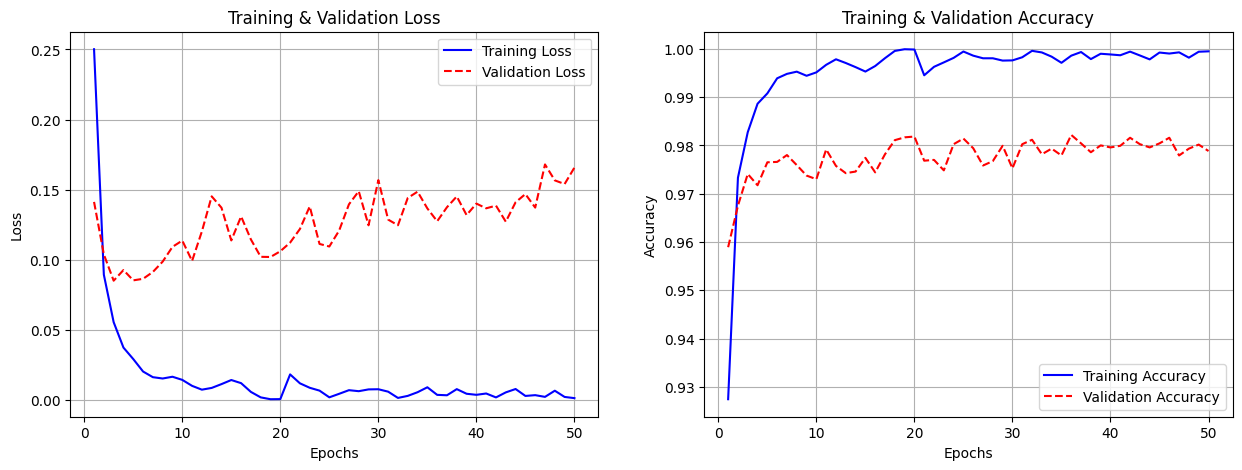

In [92]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_mnist.history['loss'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_mnist.history['accuracy'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [93]:
loss, accuracy = mnist.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.14498
Accuracy = 0.97830


> ## 6) Model Predict

* Probability

In [94]:
np.set_printoptions(suppress = True, precision = 9)

print(mnist.predict(X_test[:1,:], verbose = 0))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


* Class

In [95]:
print(np.argmax(mnist.predict(X_test[:1,:], verbose = 0)))

7


> ## 7) Image Visualization

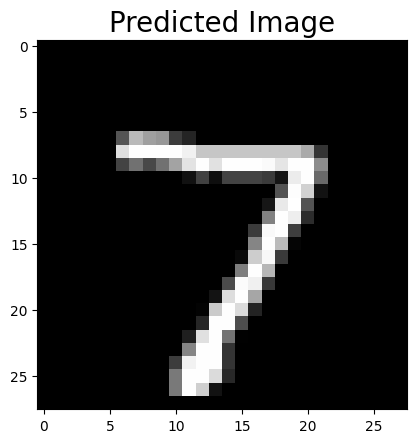

In [96]:
plt.imshow(X_test[0].reshape(28, 28), cmap = 'gray')
plt.title('Predicted Image', fontsize = 20)
plt.show()

> ## 8) Confusion Matrix

In [97]:
y_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [98]:
np.argmax(y_test, axis = 1)

array([7, 2, 1, ..., 4, 5, 6])

In [99]:
mnist.predict(X_test, verbose = 0)

array([[0.         , 0.         , 0.         , ..., 1.         , 0.         , 0.         ],
       [0.         , 0.         , 1.         , ..., 0.         , 0.         , 0.         ],
       [0.         , 1.         , 0.         , ..., 0.000000002, 0.         , 0.         ],
       ...,
       [0.         , 0.         , 0.         , ..., 0.         , 0.         , 0.         ],
       [0.         , 0.         , 0.         , ..., 0.         , 0.         , 0.         ],
       [0.         , 0.         , 0.         , ..., 0.         , 0.         , 0.         ]], dtype=float32)

In [100]:
np.argmax(mnist.predict(X_test, verbose = 0), axis = 1)

array([7, 2, 1, ..., 4, 5, 6])

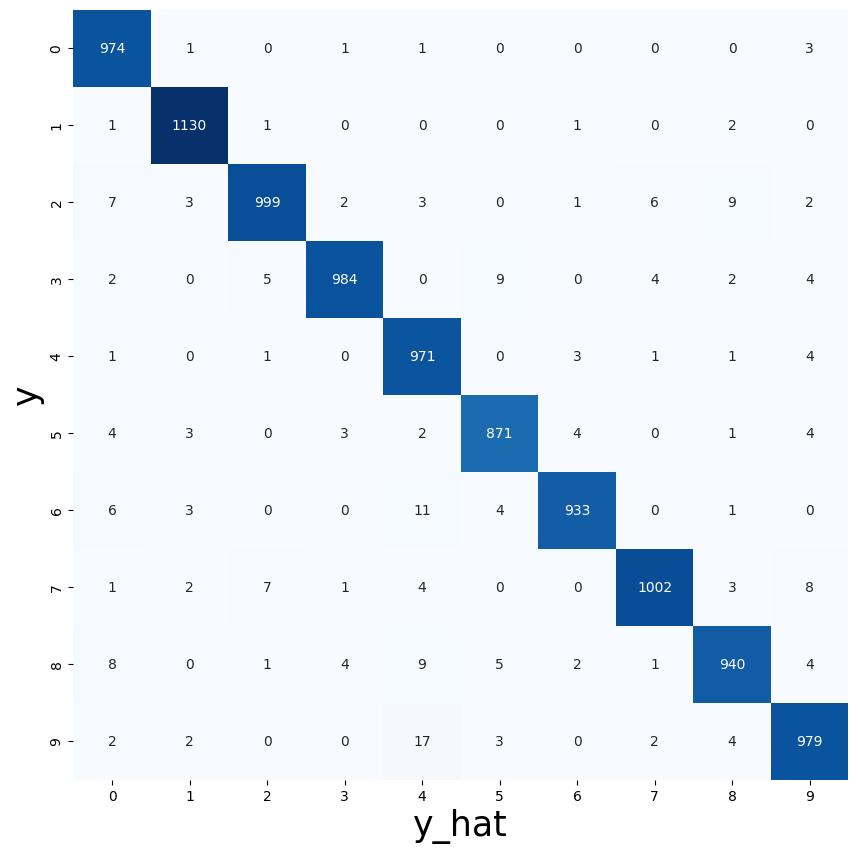

In [101]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

CM = confusion_matrix(np.argmax(y_test, axis = 1), # y true
                      np.argmax(mnist.predict(X_test, verbose = 0), axis = 1)) # y pred

plt.figure(figsize = (10, 10))
sns.heatmap(CM,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            cbar = False)
plt.xlabel('y_hat', fontsize = 25)
plt.ylabel('y', fontsize = 25)
plt.show()

> ## 9) Classification Report

In [102]:
from sklearn.metrics import classification_report

print('\n',
      classification_report(np.argmax(y_test, axis = 1),
                            np.argmax(mnist.predict(X_test, verbose = 0), axis = 1)))


               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.95      0.99      0.97       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# 1)  model capacity 줄이기

In [103]:
mnist1 = models.Sequential()
mnist1.add(layers.Dense(256, activation = 'relu', input_shape = (28 * 28,)))
mnist1.add(layers.Dense(10, activation = 'softmax'))

In [104]:
mnist1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               200960    
                                                                 
 dense_21 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [105]:
mnist1.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [106]:
# %%time

Hist_mnist1 = mnist1.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3348 - accuracy: 0.9078 - val_loss: 0.2065 - val_accuracy: 0.9412
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.1474 - accuracy: 0.9588 - val_loss: 0.1484 - val_accuracy: 0.9572
Epoch 3/50
375/375 [==============================] - 1s 4ms/step - loss: 0.1021 - accuracy: 0.9696 - val_loss: 0.1218 - val_accuracy: 0.9648
Epoch 4/50
375/375 [==============================] - 1s 4ms/step - loss: 0.0745 - accuracy: 0.9784 - val_loss: 0.1091 - val_accuracy: 0.9678
Epoch 5/50
375/375 [==============================] - 1s 4ms/step - loss: 0.0570 - accuracy: 0.9832 - val_loss: 0.0952 - val_accuracy: 0.9725
Epoch 6/50
375/375 [==============================] - 1s 4ms/step - loss: 0.0458 - accuracy: 0.9868 - val_loss: 0.0897 - val_accuracy: 0.9736
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0358 - accuracy: 0.9900 - val_loss: 0.0887 - val_accuracy: 0.9748
Epoch 

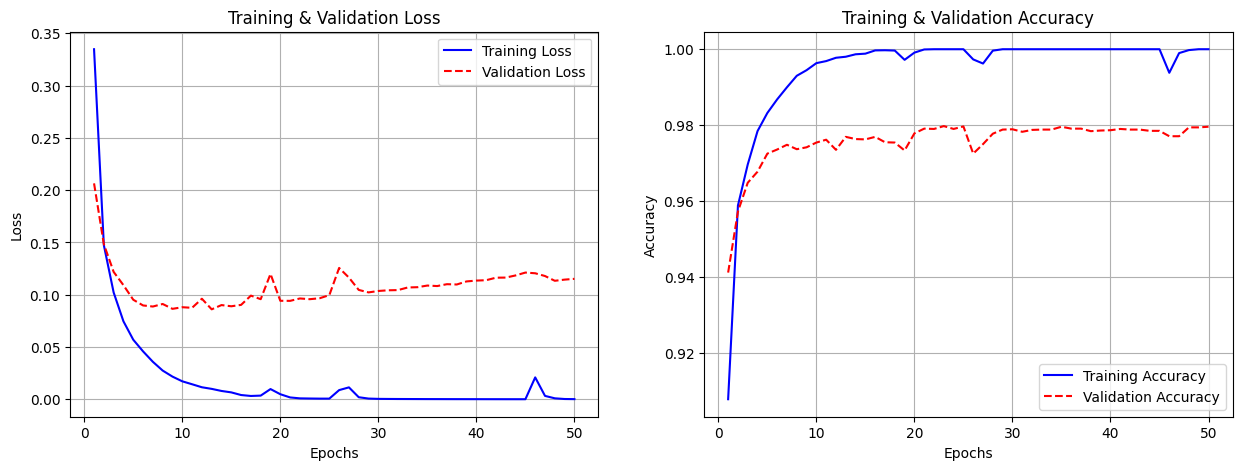

In [107]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist1.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_mnist1.history['loss'], 'b-')
plt.plot(epochs, Hist_mnist1.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_mnist1.history['accuracy'], 'b-')
plt.plot(epochs, Hist_mnist1.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# L2 Regularization
- https://wooono.tistory.com/221
- L1 Regularization 의 개념에서 가장 중요한 것은 cost function 에 가중치의 절대값을 더해준다는 것
- 기존의 cost function 에 가중치의 제곱을 더함으로써 가중치가 너무 크지 않은 방향으로 학습되게 됩니다.
L1 Loss, L2 Loss 의 차이
L2 Loss 는 직관적으로 오차의 제곱을 더하기 때문에 Outlier 에 더 큰 영향을 받습니다.
"L1 Loss 가 L2 Loss 에 비해 Outlier 에 대하여 더 Robust(덜 민감 혹은 둔감) 하다." 라고 표현 할 수 있습니다.
Outlier 가 적당히 무시되길 원한다면 L1 Loss 를 사용하고
Outlier 의 등장에 신경써야 하는 경우라면 L2 Loss 를 사용하는 것이 좋겠습니다.
L1 Loss 는 0인 지점에서 미분이 불가능하다는 단점 또한 가지고 있습니다.

L1 Regularization, L2 Regularization 의 차이와 선택 기준
L1 Regularization은 가중치 업데이트 시, 가중치의 크기에 상관 없이 상수값을 빼면서 진행됩니다.

때문에 작은 가중치들은 거의 0으로 수렴 되어, 몇개의 중요한 가중치들만 남게 됩니다.

그러므로 몇 개의 의미 있는 값을 끄집어내고 싶은 sparse model 같은 경우에는 L1 Regularization이 효과적입니다.

다만, L1 Regularization은 아래 그림처럼 미분 불가능한 점이 있기 때문에 Gradient-base learning 에는 주의가 필요합니다.


L2 Regularization은 가중치 업데이트 시, 가중치의 크기가 직접적인 영향을 미칩니다.

따라서, L2는 L1 보다 가중치 규제에 좀 더 효과적입니다.

In [108]:
from tensorflow.keras import models, layers, regularizers

mnist_L2R = models.Sequential()
mnist_L2R.add(layers.Dense(512, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.00001), # l2 기본값 0.01
                       input_shape = (28 * 28,)))
mnist_L2R.add(layers.Dense(256, activation = 'relu',
                      kernel_regularizer = regularizers.l2(0.00001)))
mnist_L2R.add(layers.Dense(10, activation = 'softmax'))

In [109]:
mnist_L2R.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 512)               401920    
                                                                 
 dense_23 (Dense)            (None, 256)               131328    
                                                                 
 dense_24 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
mnist_L2R.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [111]:
# %%time

mnist_L2R_H = mnist_L2R.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/50
375/375 [==============================] - 3s 5ms/step - loss: 0.2642 - accuracy: 0.9240 - val_loss: 0.1456 - val_accuracy: 0.9588
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.1031 - accuracy: 0.9720 - val_loss: 0.1128 - val_accuracy: 0.9702
Epoch 3/50
375/375 [==============================] - 2s 6ms/step - loss: 0.0691 - accuracy: 0.9820 - val_loss: 0.1194 - val_accuracy: 0.9671
Epoch 4/50
375/375 [==============================] - 2s 4ms/step - loss: 0.0520 - accuracy: 0.9876 - val_loss: 0.0994 - val_accuracy: 0.9741
Epoch 5/50
375/375 [==============================] - 2s 4ms/step - loss: 0.0430 - accuracy: 0.9903 - val_loss: 0.0954 - val_accuracy: 0.9776
Epoch 6/50
375/375 [==============================] - 1s 4ms/step - loss: 0.0375 - accuracy: 0.9919 - val_loss: 0.1022 - val_accuracy: 0.9747
Epoch 7/50
375/375 [==============================] - 1s 4ms/step - loss: 0.0327 - accuracy: 0.9936 - val_loss: 0.1070 - val_accuracy: 0.9758
Epoch 

==== L2 Regularization ====


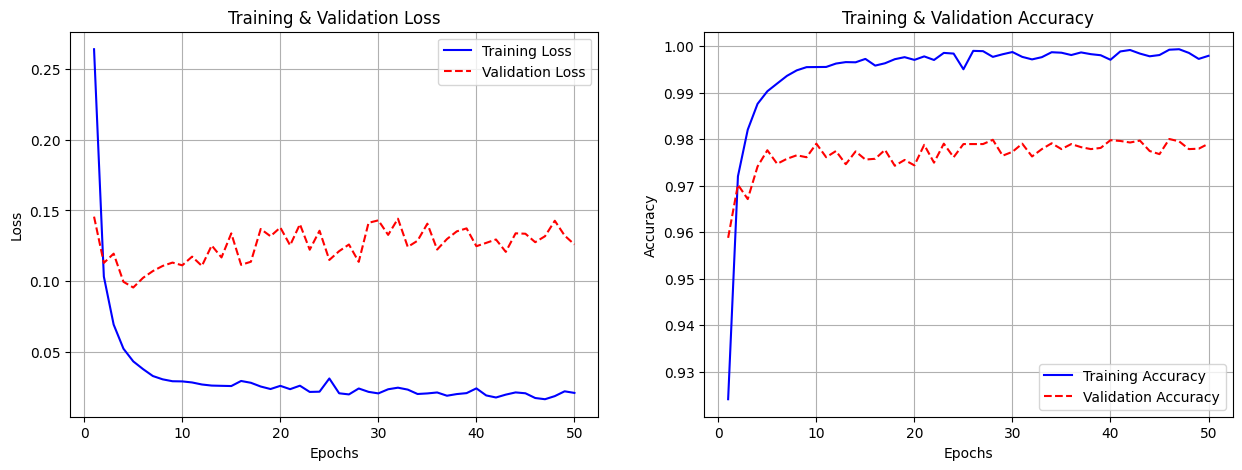

In [112]:
import matplotlib.pyplot as plt
print('==== L2 Regularization ====')

epochs = range(1, len(mnist_L2R_H.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, mnist_L2R_H.history['loss'], 'b-')
plt.plot(epochs, mnist_L2R_H.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, mnist_L2R_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_L2R_H.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# Drop out

In [113]:
mnist_D = models.Sequential()
mnist_D.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
mnist_D.add(layers.Dropout(0.4))
mnist_D.add(layers.Dense(256, activation = 'relu'))
mnist_D.add(layers.Dropout(0.2))
mnist_D.add(layers.Dense(10, activation = 'softmax'))

In [114]:
mnist_D.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [115]:
mnist_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [116]:
# %%time
mnist_D_H = mnist_D.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/50
375/375 [==============================] - 4s 6ms/step - loss: 0.3301 - accuracy: 0.9005 - val_loss: 0.1405 - val_accuracy: 0.9582
Epoch 2/50
375/375 [==============================] - 2s 4ms/step - loss: 0.1421 - accuracy: 0.9563 - val_loss: 0.1078 - val_accuracy: 0.9692
Epoch 3/50
375/375 [==============================] - 1s 4ms/step - loss: 0.1060 - accuracy: 0.9677 - val_loss: 0.0965 - val_accuracy: 0.9704
Epoch 4/50
375/375 [==============================] - 2s 4ms/step - loss: 0.0860 - accuracy: 0.9731 - val_loss: 0.0901 - val_accuracy: 0.9743
Epoch 5/50
375/375 [==============================] - 2s 4ms/step - loss: 0.0775 - accuracy: 0.9754 - val_loss: 0.0927 - val_accuracy: 0.9743
Epoch 6/50
375/375 [==============================] - 1s 4ms/step - loss: 0.0622 - accuracy: 0.9798 - val_loss: 0.0865 - val_accuracy: 0.9775
Epoch 7/50
375/375 [==============================] - 2s 4ms/step - loss: 0.0546 - accuracy: 0.9822 - val_loss: 0.0843 - val_accuracy: 0.9776
Epoch 

==== Drop Out ====


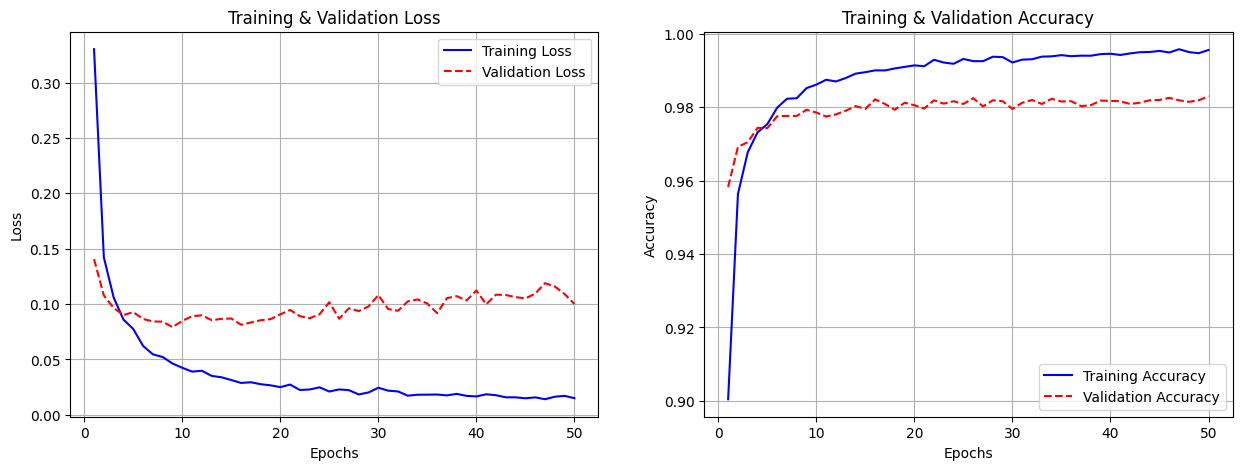

In [117]:
import matplotlib.pyplot as plt
print('==== Drop Out ====')

epochs = range(1, len(mnist_D_H.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, mnist_D_H.history['loss'], 'b-')
plt.plot(epochs, mnist_D_H.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, mnist_D_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_D_H.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# Batch Normalization

In [118]:
mnist_BN = models.Sequential()
mnist_BN.add(layers.Dense(512, input_shape = (28 * 28,)))
mnist_BN.add(layers.BatchNormalization())
mnist_BN.add(layers.Activation('relu'))
mnist_BN.add(layers.Dense(256 ))
mnist_BN.add(layers.BatchNormalization())
mnist_BN.add(layers.Activation('relu'))
mnist_BN.add(layers.Dense(10, activation = 'softmax'))

In [119]:
mnist_BN.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_3 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 activation_3 (Activation)   (None, 256)             

In [120]:
mnist_BN.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [121]:
# %%time

mnist_BN_H = mnist_BN.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/50
375/375 [==============================] - 4s 6ms/step - loss: 0.1918 - accuracy: 0.9428 - val_loss: 0.1349 - val_accuracy: 0.9603
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0736 - accuracy: 0.9776 - val_loss: 0.1012 - val_accuracy: 0.9694
Epoch 3/50
375/375 [==============================] - 3s 8ms/step - loss: 0.0435 - accuracy: 0.9865 - val_loss: 0.0967 - val_accuracy: 0.9710
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0320 - accuracy: 0.9898 - val_loss: 0.1229 - val_accuracy: 0.9659
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0225 - accuracy: 0.9929 - val_loss: 0.0947 - val_accuracy: 0.9736
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0157 - accuracy: 0.9953 - val_loss: 0.0829 - val_accuracy: 0.9758
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0151 - accuracy: 0.9953 - val_loss: 0.1113 - val_accuracy: 0.9707
Epoch 

==== Batch Normalization ====


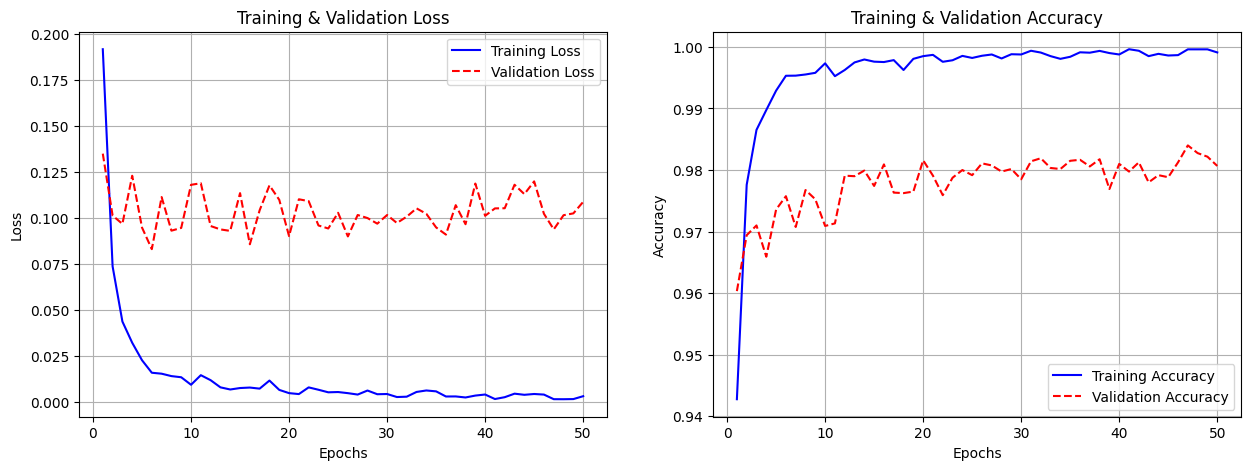

In [122]:
import matplotlib.pyplot as plt
print('==== Batch Normalization ====')

epochs = range(1, len(mnist_BN_H.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, mnist_BN_H.history['loss'], 'b-')
plt.plot(epochs, mnist_BN_H.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, mnist_BN_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_BN_H.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# loss 결과 비교

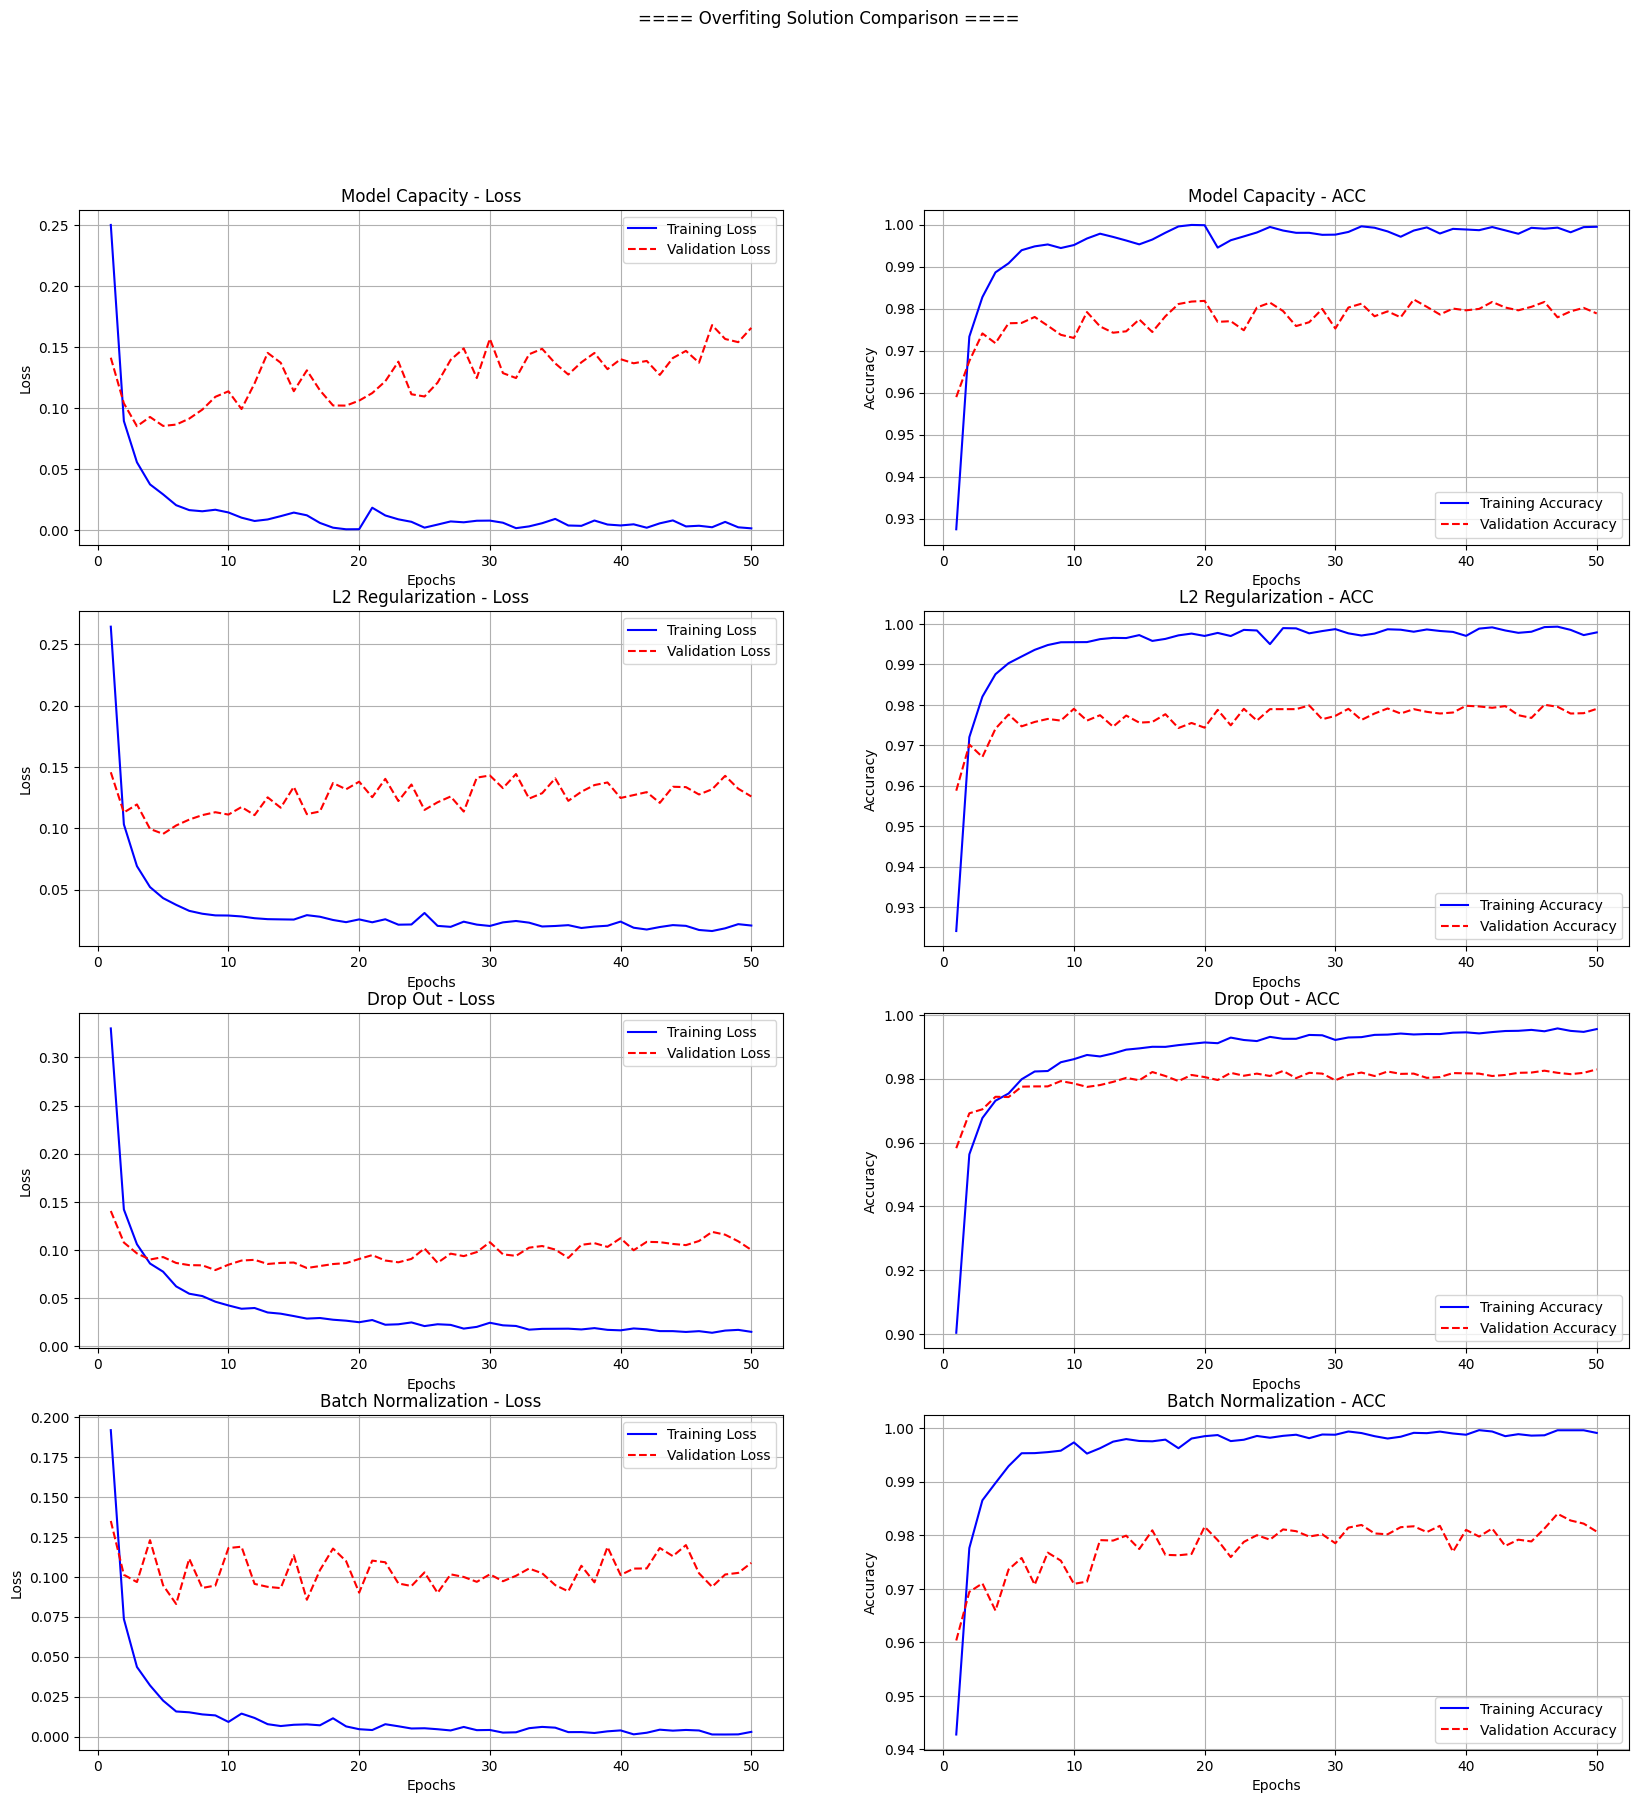

In [123]:
import matplotlib.pyplot as plt

epochs = range(1, len(mnist_BN_H.history['loss']) + 1)
plt.figure(figsize = (20, 20))
plt.suptitle('==== Overfiting Solution Comparison ====')


plt.subplot(4, 2, 1)
plt.plot(epochs, Hist_mnist.history['loss'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_loss'], 'r--')
plt.title('Model Capacity - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 2)
plt.plot(epochs, Hist_mnist.history['accuracy'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_accuracy'], 'r--')
plt.title('Model Capacity - ACC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()


plt.subplot(4, 2, 3)
plt.plot(epochs, mnist_L2R_H.history['loss'], 'b-')
plt.plot(epochs, mnist_L2R_H.history['val_loss'], 'r--')
plt.title('L2 Regularization - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 4)
plt.plot(epochs, mnist_L2R_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_L2R_H.history['val_accuracy'], 'r--')
plt.title('L2 Regularization - ACC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()


plt.subplot(4, 2, 5)
plt.plot(epochs, mnist_D_H.history['loss'], 'b-')
plt.plot(epochs, mnist_D_H.history['val_loss'], 'r--')
plt.title('Drop Out - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 6)
plt.plot(epochs, mnist_D_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_D_H.history['val_accuracy'], 'r--')
plt.title('Drop Out - ACC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()



plt.subplot(4, 2, 7)
plt.plot(epochs, mnist_BN_H.history['loss'], 'b-')
plt.plot(epochs, mnist_BN_H.history['val_loss'], 'r--')
plt.title('Batch Normalization - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 8)
plt.plot(epochs, mnist_BN_H.history['accuracy'], 'b-')
plt.plot(epochs, mnist_BN_H.history['val_accuracy'], 'r--')
plt.title('Batch Normalization - ACC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# Batch Normalization & Drop out

In [124]:
mnist_BN_D = models.Sequential()

mnist_BN_D.add(layers.Dense(512, input_shape = (28 * 28,)))
mnist_BN_D.add(layers.BatchNormalization())
mnist_BN_D.add(layers.Activation('relu'))
mnist_BN_D.add(layers.Dropout(0.4))

mnist_BN_D.add(layers.Dense(256 ))
mnist_BN_D.add(layers.BatchNormalization())
mnist_BN_D.add(layers.Activation('relu'))
mnist_BN_D.add(layers.Dropout(0.4))
mnist_BN_D.add(layers.Dense(10, activation = 'softmax'))

In [125]:
mnist_BN_D.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_4 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_32 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_5 (Bat  (None, 256)               1024      
 chNormalization)                                    

In [126]:
mnist_BN_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [127]:
# %%time

mnist_BN_D_H = mnist_BN_D.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/50
375/375 [==============================] - 4s 6ms/step - loss: 0.3455 - accuracy: 0.8942 - val_loss: 0.1576 - val_accuracy: 0.9519
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.1732 - accuracy: 0.9477 - val_loss: 0.1170 - val_accuracy: 0.9645
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.1285 - accuracy: 0.9603 - val_loss: 0.0952 - val_accuracy: 0.9721
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.1053 - accuracy: 0.9679 - val_loss: 0.0899 - val_accuracy: 0.9728
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0918 - accuracy: 0.9715 - val_loss: 0.0871 - val_accuracy: 0.9744
Epoch 6/50
375/375 [==============================] - 3s 8ms/step - loss: 0.0767 - accuracy: 0.9765 - val_loss: 0.0879 - val_accuracy: 0.9738
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0697 - accuracy: 0.9776 - val_loss: 0.0766 - val_accuracy: 0.9772
Epoch 

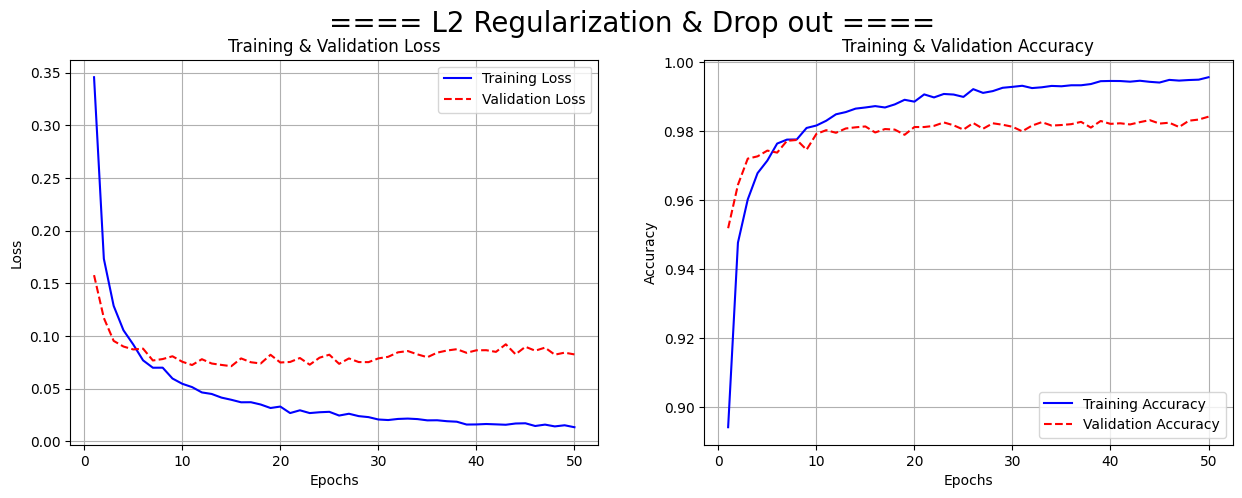

In [131]:
import matplotlib.pyplot as plt

history_model = mnist_BN_D_H

epochs = range(1, len(history_model.history['loss']) + 1)
plt.figure(figsize = (15, 5))
plt.suptitle('==== L2 Regularization & Drop out ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# L2 Regularization & Drop out

In [132]:
from tensorflow.keras import models, layers, regularizers

mnist_L2R_D = models.Sequential()
mnist_L2R_D.add(layers.Dense(512, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
mnist_L2R_D.add(layers.Dropout(0.4))
mnist_L2R_D.add(layers.Dense(256, activation = 'relu',
                      kernel_regularizer = regularizers.l2(0.00001)))
mnist_L2R_D.add(layers.Dropout(0.2))
mnist_L2R_D.add(layers.Dense(10, activation = 'softmax'))

In [133]:
mnist_L2R_D.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 512)               401920    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_35 (Dense)            (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_36 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [134]:
mnist_L2R_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [135]:
# %%time

mnist_L2R_D_H = mnist_L2R_D.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/50
375/375 [==============================] - 3s 5ms/step - loss: 0.3400 - accuracy: 0.8996 - val_loss: 0.1592 - val_accuracy: 0.9557
Epoch 2/50
375/375 [==============================] - 2s 4ms/step - loss: 0.1543 - accuracy: 0.9565 - val_loss: 0.1195 - val_accuracy: 0.9675
Epoch 3/50
375/375 [==============================] - 2s 6ms/step - loss: 0.1153 - accuracy: 0.9676 - val_loss: 0.1049 - val_accuracy: 0.9731
Epoch 4/50
375/375 [==============================] - 3s 8ms/step - loss: 0.0991 - accuracy: 0.9724 - val_loss: 0.0992 - val_accuracy: 0.9757
Epoch 5/50
375/375 [==============================] - 3s 8ms/step - loss: 0.0863 - accuracy: 0.9770 - val_loss: 0.0991 - val_accuracy: 0.9750
Epoch 6/50
375/375 [==============================] - 3s 8ms/step - loss: 0.0809 - accuracy: 0.9792 - val_loss: 0.0938 - val_accuracy: 0.9771
Epoch 7/50
375/375 [==============================] - 2s 4ms/step - loss: 0.0711 - accuracy: 0.9817 - val_loss: 0.0977 - val_accuracy: 0.9787
Epoch 

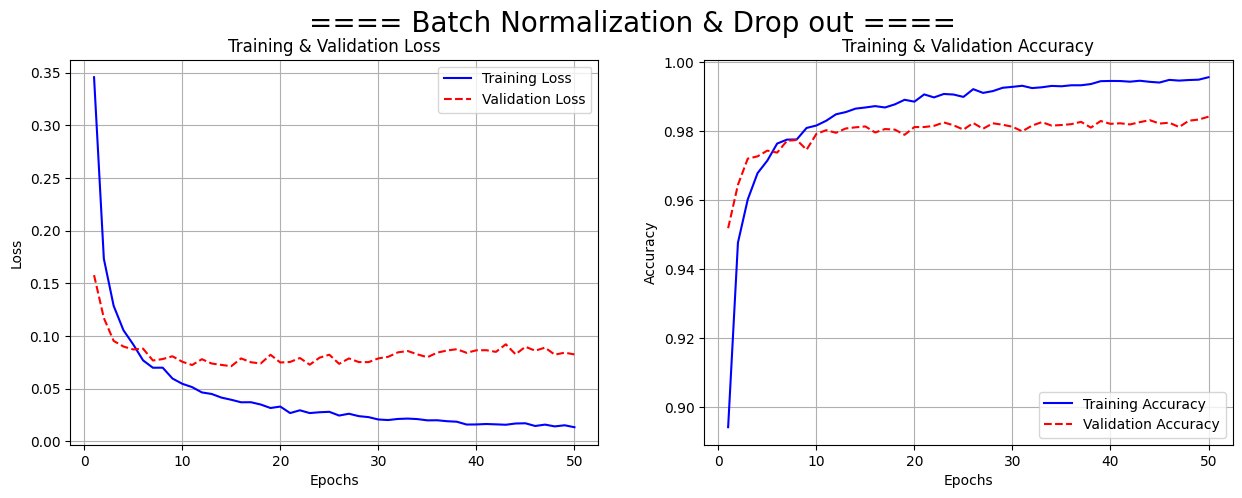

In [136]:
import matplotlib.pyplot as plt

history_model = mnist_Bmnist_L2R_D_HN_D_H
epochs = range(1, len(history_model.history['loss']) + 1)

plt.figure(figsize = (15, 5))
plt.suptitle('==== Batch Normalization & Drop out ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# L2 Regularization & Batch Normalization

In [137]:
from tensorflow.keras import models, layers, regularizers

mnist_L2R_BN = models.Sequential()
mnist_L2R_BN.add(layers.Dense(512,
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
mnist_L2R_BN.add(layers.BatchNormalization())
mnist_L2R_BN.add(layers.Activation('relu'))


mnist_L2R_BN.add(layers.Dense(256,
                      kernel_regularizer = regularizers.l2(0.00001)))
mnist_L2R_BN.add(layers.BatchNormalization())
mnist_L2R_BN.add(layers.Activation('relu'))

mnist_L2R_BN.add(layers.Dense(10, activation = 'softmax'))

In [138]:
mnist_L2R_BN.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_6 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 512)               0         
                                                                 
 dense_38 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_7 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 activation_7 (Activation)   (None, 256)             

In [139]:
mnist_L2R_BN.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [140]:
# %%time

mnist_L2R_BN_H = mnist_L2R_BN.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/50
375/375 [==============================] - 4s 6ms/step - loss: 0.1984 - accuracy: 0.9436 - val_loss: 0.1364 - val_accuracy: 0.9618
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0815 - accuracy: 0.9778 - val_loss: 0.1227 - val_accuracy: 0.9663
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0533 - accuracy: 0.9866 - val_loss: 0.1013 - val_accuracy: 0.9739
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0420 - accuracy: 0.9903 - val_loss: 0.1045 - val_accuracy: 0.9715
Epoch 5/50
375/375 [==============================] - 3s 8ms/step - loss: 0.0353 - accuracy: 0.9925 - val_loss: 0.1023 - val_accuracy: 0.9746
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0291 - accuracy: 0.9946 - val_loss: 0.1015 - val_accuracy: 0.9738
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0303 - accuracy: 0.9942 - val_loss: 0.1240 - val_accuracy: 0.9689
Epoch 

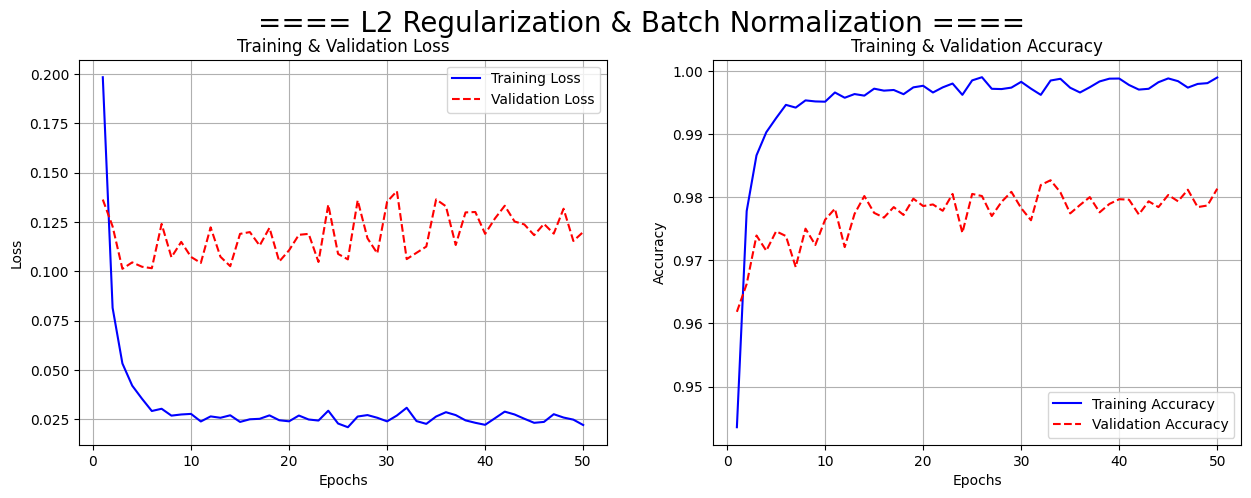

In [141]:
import matplotlib.pyplot as plt

history_model = mnist_L2R_BN_H
epochs = range(1, len(history_model.history['loss']) + 1)

plt.figure(figsize = (15, 5))
plt.suptitle('==== L2 Regularization & Batch Normalization ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# L2 Regularization & Batch Normalization & Drop out

In [142]:
from tensorflow.keras import models, layers, regularizers

mnist_L2R_BN_D = models.Sequential()
mnist_L2R_BN_D.add(layers.Dense(512,
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
mnist_L2R_BN_D.add(layers.BatchNormalization())
mnist_L2R_BN_D.add(layers.Activation('relu'))
mnist_L2R_BN_D.add(layers.Dropout(0.4))

mnist_L2R_BN_D.add(layers.Dense(256,
                      kernel_regularizer = regularizers.l2(0.00001)))
mnist_L2R_BN_D.add(layers.BatchNormalization())
mnist_L2R_BN_D.add(layers.Activation('relu'))
mnist_L2R_BN_D.add(layers.Dropout(0.2))

mnist_L2R_BN_D.add(layers.Dense(10, activation = 'softmax'))

In [143]:
mnist_L2R_BN_D.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_8 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 512)               0         
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_41 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_9 (Bat  (None, 256)               1024      
 chNormalization)                                    

In [144]:
mnist_L2R_BN_D.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [145]:
# %%time

mnist_L2R_BN_D_H = mnist_L2R_BN_D.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/50
375/375 [==============================] - 4s 6ms/step - loss: 0.2991 - accuracy: 0.9114 - val_loss: 0.1490 - val_accuracy: 0.9595
Epoch 2/50
375/375 [==============================] - 2s 6ms/step - loss: 0.1521 - accuracy: 0.9559 - val_loss: 0.1227 - val_accuracy: 0.9668
Epoch 3/50
375/375 [==============================] - 3s 7ms/step - loss: 0.1181 - accuracy: 0.9661 - val_loss: 0.1024 - val_accuracy: 0.9726
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0981 - accuracy: 0.9717 - val_loss: 0.1032 - val_accuracy: 0.9733
Epoch 5/50
375/375 [==============================] - 3s 7ms/step - loss: 0.0883 - accuracy: 0.9751 - val_loss: 0.0935 - val_accuracy: 0.9765
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0804 - accuracy: 0.9784 - val_loss: 0.1001 - val_accuracy: 0.9744
Epoch 7/50
375/375 [==============================] - 2s 6ms/step - loss: 0.0736 - accuracy: 0.9800 - val_loss: 0.0963 - val_accuracy: 0.9765
Epoch 

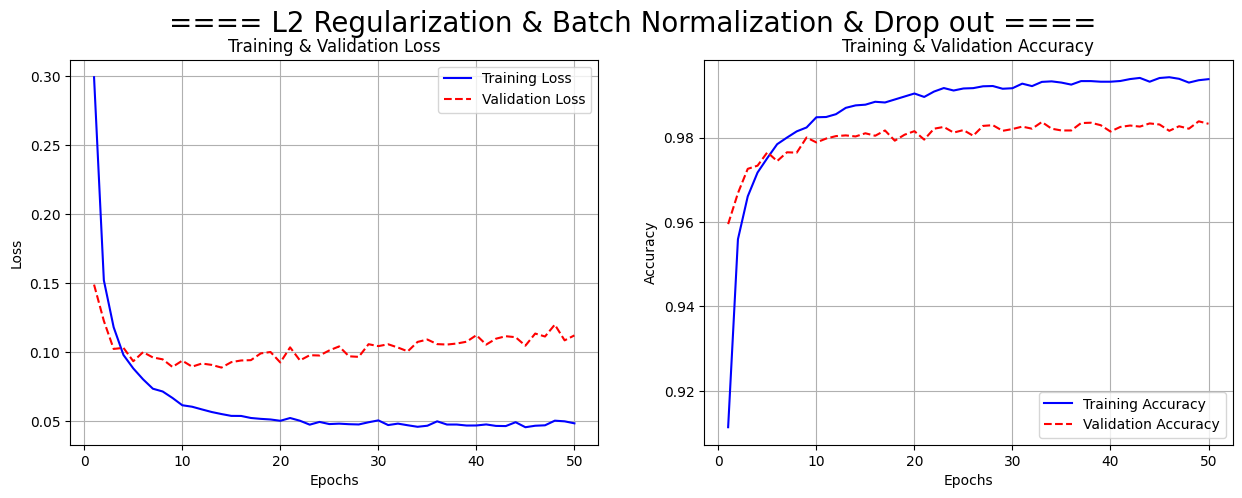

In [146]:
import matplotlib.pyplot as plt

history_model = mnist_L2R_BN_D_H
epochs = range(1, len(history_model.history['loss']) + 1)

plt.figure(figsize = (15, 5))
plt.suptitle('==== L2 Regularization & Batch Normalization & Drop out ====', fontsize = 20)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_model.history['loss'], 'b-')
plt.plot(epochs, history_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_model.history['accuracy'], 'b-')
plt.plot(epochs, history_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

# 조합 loss 결과 비교

In [147]:
model_h_list = ['mnist_L2R_BN_H', 'mnist_L2R_D_H', 'mnist_BN_D_H', 'mnist_L2R_BN_D_H']
model_h_vlist = [mnist_L2R_BN_H, mnist_L2R_D_H, mnist_BN_D_H, mnist_L2R_BN_D_H]

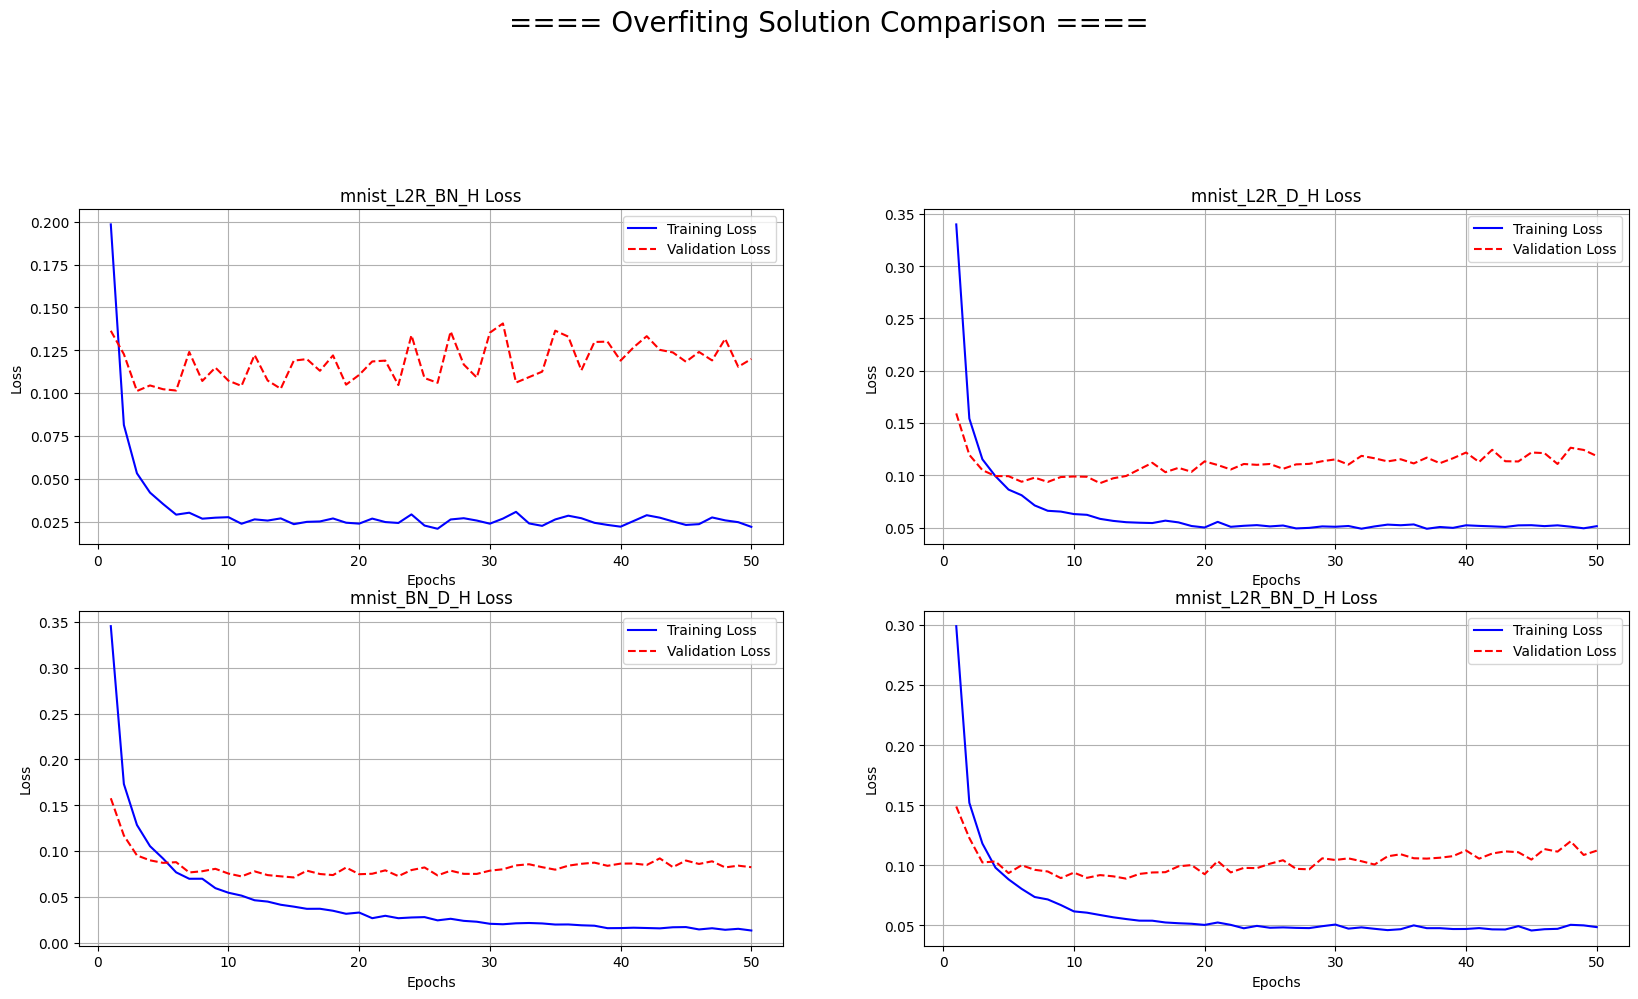

In [148]:
import matplotlib.pyplot as plt

epochs = range(1, len(mnist_BN_H.history['loss']) + 1)
plt.figure(figsize = (20, 20))
plt.suptitle('==== Overfiting Solution Comparison ====', fontsize=20)


for i in range(len(model_h_list)):
    plt.subplot(len(model_h_list), int(len(model_h_list)/2), i+1)
    plt.plot(epochs, model_h_vlist[i].history['loss'], 'b-')
    plt.plot(epochs, model_h_vlist[i].history['val_loss'], 'r--')
    plt.title(f'{model_h_list[i]} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.grid()

plt.show()

# The End